In [15]:
import numpy as np
import pandas as pd

In [16]:
data_raw = pd.read_parquet("datasets/result-1681901450873.parquet.gzip")\
    .drop_duplicates(subset=None, keep='first', inplace=False)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594337 entries, 0 to 1594336
Data columns (total 39 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1594337 non-null  object 
 1   collect_ts                1594337 non-null  int64  
 2   uuid                      1594337 non-null  object 
 3   model_name                1594337 non-null  object 
 4   series_code               1594337 non-null  object 
 5   msg_create_time           1594337 non-null  object 
 6   vcu_VehicleMode           1593107 non-null  float32
 7   vcu_vehicleSpeed          1593106 non-null  float32
 8   VCU_VehicleSpeedValid     1593106 non-null  float32
 9   vcu_state                 1594033 non-null  float32
 10  bms_SOC                   1592904 non-null  float32
 11  bms_state                 1594337 non-null  float32
 12  BCM_ebs_U_BATT            185600 non-null   float32
 13  BCM_ebs_SOC               1

1. ebs_Q_Charge ebs_Q_Discharge BCM_ebs_I_BATT  dcdc_OverTemperature 一直为 0.0，同时又不是状态值，直接删除这些特征
2. IC_LowBatteryvoltage  DCDC_realInputVoltage  DCDC_realInputCurrent 全为空，直接删除这些特征
3. DCDC_MCU_HVIL_Warning DCDC_BMS_HVIL_Warning DCDC_HV_InterlockStatus1 DCDC_HV_InterlockStatus dcdc_deratingStatus 作为状态值先保留
4. BCM_ebs_U_BATT 中间存在 3.0 的值将这部分提取出来进一步观察

In [ ]:
data_raw["vin"].drop_duplicates()

In [ ]:
import seaborn as sns
sns.distplot(data_raw[data_raw.dcdc_realOutputVoltage < 11.].dcdc_realOutputVoltage, hist=True, kde=False)

In [ ]:
pd.DataFrame(data_raw[data_raw.BCM_ebs_U_BATT > 14.25].BCM_ebs_U_BATT.value_counts()).sort_values(by='BCM_ebs_U_BATT')

In [ ]:
import seaborn as sns
sns.distplot(data_raw[data_raw.BCM_ebs_U_BATT > 14.252].BCM_ebs_U_BATT, hist=True, kde=False)

In [ ]:
data_raw.describe()

In [17]:
drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594337 entries, 0 to 1594336
Data columns (total 32 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1594337 non-null  object 
 1   collect_ts                1594337 non-null  int64  
 2   uuid                      1594337 non-null  object 
 3   model_name                1594337 non-null  object 
 4   series_code               1594337 non-null  object 
 5   msg_create_time           1594337 non-null  object 
 6   vcu_VehicleMode           1593107 non-null  float32
 7   vcu_vehicleSpeed          1593106 non-null  float32
 8   VCU_VehicleSpeedValid     1593106 non-null  float32
 9   vcu_state                 1594033 non-null  float32
 10  bms_SOC                   1592904 non-null  float32
 11  bms_state                 1594337 non-null  float32
 12  BCM_ebs_U_BATT            185600 non-null   float32
 13  BCM_ebs_SOC               1

In [ ]:
pd.DataFrame(data_raw["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')

In [ ]:
data_3 = data_raw[data_raw.BCM_ebs_U_BATT == 3.]
data_3

In [ ]:
# 很明显这部分数据要排除
data_3.describe()

In [18]:
data_raw = data_raw.fillna(method='ffill')

In [19]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594337 entries, 0 to 1594336
Data columns (total 32 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1594337 non-null  object 
 1   collect_ts                1594337 non-null  int64  
 2   uuid                      1594337 non-null  object 
 3   model_name                1594337 non-null  object 
 4   series_code               1594337 non-null  object 
 5   msg_create_time           1594337 non-null  object 
 6   vcu_VehicleMode           1594337 non-null  float32
 7   vcu_vehicleSpeed          1594337 non-null  float32
 8   VCU_VehicleSpeedValid     1594337 non-null  float32
 9   vcu_state                 1594337 non-null  float32
 10  bms_SOC                   1594337 non-null  float32
 11  bms_state                 1594337 non-null  float32
 12  BCM_ebs_U_BATT            1588491 non-null  float32
 13  BCM_ebs_SOC               1

In [20]:
# 清除异常数据之后的数据

data = data_raw[(data_raw.BCM_ebs_U_BATT > 3.) &(data_raw.BCM_ebs_U_BATT < 18.)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568147 entries, 5846 to 1594336
Data columns (total 32 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1568147 non-null  object 
 1   collect_ts                1568147 non-null  int64  
 2   uuid                      1568147 non-null  object 
 3   model_name                1568147 non-null  object 
 4   series_code               1568147 non-null  object 
 5   msg_create_time           1568147 non-null  object 
 6   vcu_VehicleMode           1568147 non-null  float32
 7   vcu_vehicleSpeed          1568147 non-null  float32
 8   VCU_VehicleSpeedValid     1568147 non-null  float32
 9   vcu_state                 1568147 non-null  float32
 10  bms_SOC                   1568147 non-null  float32
 11  bms_state                 1568147 non-null  float32
 12  BCM_ebs_U_BATT            1568147 non-null  float32
 13  BCM_ebs_SOC               156

In [ ]:
data.info()

In [ ]:
data[data["BCM_ebs_U_BATT"] < 10.5]["vin"].value_counts()

In [ ]:
data[data.dcdc_realOutputVoltage < 11.].dcdc_realOutputVoltage.hist(bins=11, figsize=(10,3))

In [ ]:
data.info()

array([[<Axes: xlabel='dcdc_realOutputVoltage', ylabel='dcdc_realOutputVoltage'>,
        <Axes: xlabel='BCM_ebs_U_BATT', ylabel='dcdc_realOutputVoltage'>,
        <Axes: xlabel='vcu_vehicleSpeed', ylabel='dcdc_realOutputVoltage'>],
       [<Axes: xlabel='dcdc_realOutputVoltage', ylabel='BCM_ebs_U_BATT'>,
        <Axes: xlabel='BCM_ebs_U_BATT', ylabel='BCM_ebs_U_BATT'>,
        <Axes: xlabel='vcu_vehicleSpeed', ylabel='BCM_ebs_U_BATT'>],
       [<Axes: xlabel='dcdc_realOutputVoltage', ylabel='vcu_vehicleSpeed'>,
        <Axes: xlabel='BCM_ebs_U_BATT', ylabel='vcu_vehicleSpeed'>,
        <Axes: xlabel='vcu_vehicleSpeed', ylabel='vcu_vehicleSpeed'>]],
      dtype=object)

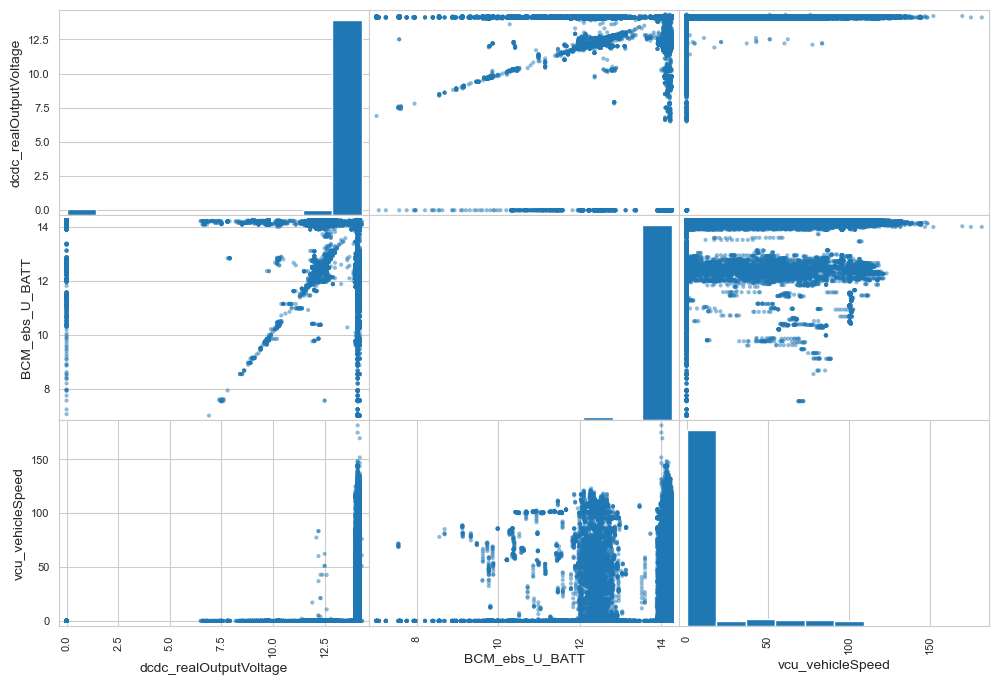

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["dcdc_realOutputVoltage", "BCM_ebs_U_BATT", "vcu_vehicleSpeed"]
scatter_matrix(data[attributes], figsize=(12, 8))